<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ 2. <b>Кросс-валидация, регуляризация и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<p>Подключение стилей оформления</p>

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
surname = "Корнеева" #Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  1


<div class="msg-block msg-warning">
  <p class="msg-text-warn">Варианты могут не совпадать с предыдущими ДЗ</p>
</div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<div class="msg-block msg-imp">
  <div class="msg-text-imp">
      <p>СРОК СДАЧИ: до <b>30 апреля 2017</b></p>
      <p style="margin:0px">ПОСЛЕ СРОКА: первая неделя <b>-25%</b>, вторая неделя и далее до конца модуля <b>-50%</b>
      </p>
  </div>
</div>

<p><b>Задача 1.</b> Регрессия + кросс-валидация</p>

<p>Дано множество наблюдений (файл "Reg_A5.csv"), регрессор - линейная регрессия. Найти степень полинома с минимальной ошибкой на проверочном подможестве, определить среднеквадратическую ошибку на тестовом подмножестве? (Степень полинома от 1 до 25)</p>
<p>
Построить графики:<br>
1) зависимости <b>среднеквадратической ошибки</b> от степени полинома для обучающего и проверочного подмножеств<br>
2) зависимости <b>R-квадрата</b> от степени полинома для обучающего и проверочного подмножеств<br>
3) функцию регрессии (наилучший случай) + исходные данные</p>

In [3]:
#0) Подключение библиотек
import pandas as pnd
import matplotlib.pyplot as plt
%matplotlib inline

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

from matplotlib.colors import ListedColormap
clrMap = ListedColormap(["blue", "red", "green"])

<p>1. Загрузка исходных данных</p>

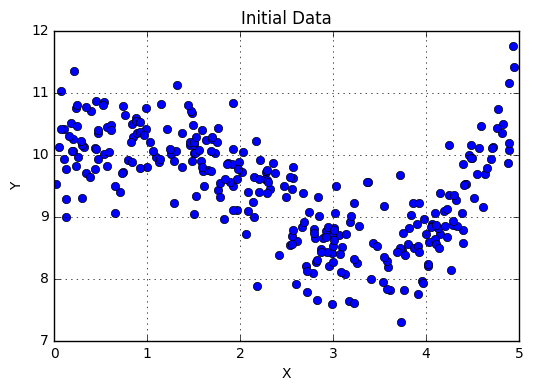

In [4]:
df = pnd.read_csv("data/Reg_A5.csv")

x = (df.X.values).reshape(-1, 1)
y = (df.Y.values).reshape(-1, 1)

plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>2. Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств двумя способами</p>

In [5]:
# Способ 1
from sklearn.model_selection import train_test_split
x_train_init, x_test, y_train_init, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

# Способ 2
# Воспользоваться KFold с параметрами n=len(x_train_init), n_folds=4, shuffle=True, random_state=0

from sklearn.cross_validation import KFold
kf = KFold(n=len(x_train_init), n_folds=4, shuffle=True, random_state=0)


/Users/lizakorneeva/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<p>3. Обучение</p>

In [6]:
#LinearRegression с нормализацией X

# Для способов 1 и 2

# Для способа 2
#Для каждой степени полинома ошибка обучения:
#MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)

#Для каждой степени полинома ошибка на проверочном подмножестве:
#MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)

#1 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

mse_train_1 = []
mse_val_1 = []
R2_train_1 = []
R2_val_1 = []

for i in range(1,26):
    model_1 = Pipeline([("plF", PolynomialFeatures(degree=i)), ("lr", LinearRegression(fit_intercept=True, normalize=True))])
    model_1.fit(x_train, y_train)
    
    y_pred_train = model_1.predict(x_train)
    mse_train_1.append(mean_squared_error(y_train, y_pred_train))
    R2_train_1.append(r2_score(y_train, y_pred_train))
    
    y_pred_val = model_1.predict(x_val)
    mse_val_1.append(mean_squared_error(y_val, y_pred_val))
    R2_val_1.append(r2_score(y_val, y_pred_val))

#2

mse_train_2 = []
mse_val_2 = []
R2_train_2 = []
R2_val_2 = []

for i in range(1,26):
    model_2 = Pipeline([("plF", PolynomialFeatures(degree=i)), ("lr", LinearRegression(fit_intercept=True, normalize=True))])
    
    MeanErrorTrain = 0
    MeanErrorValidation = 0
    num_R2_val_2 = 0
    num_R2_train_2 = 0
    
    for train_index, val_index in kf: 
        
        x_train_2 = x_train_init[train_index].reshape(-1, 1)
        x_val_2 = x_train_init[val_index].reshape(-1, 1)
        y_train_2 = y_train_init[train_index]
        y_val_2 = y_train_init[val_index]
        
        model_2.fit(x_train_2, y_train_2)
        
        y_pred_train2 = model_2.predict(x_train_2)
        MeanErrorTrain = MeanErrorTrain + 1/4 * mean_squared_error(y_train_2, y_pred_train2)
        num_R2_train_2 = num_R2_train_2 + 1/4 * r2_score(y_train_2, y_pred_train2)
        
        y_pred_val2 = model_2.predict(x_val_2)
        MeanErrorValidation = MeanErrorValidation + 1/4 * mean_squared_error(y_val_2, y_pred_val2)
        num_R2_val_2 = num_R2_val_2 + 1/4 * r2_score(y_val_2, y_pred_val2)
        
    mse_val_2.append(MeanErrorValidation)
    mse_train_2.append(MeanErrorTrain)
    R2_train_2.append(num_R2_train_2)
    R2_val_2.append(num_R2_val_2)

<p>4. Графики зависимости среднеквадратической ошибки от степени полинома для обучающего и проверочного подмножеств</p>

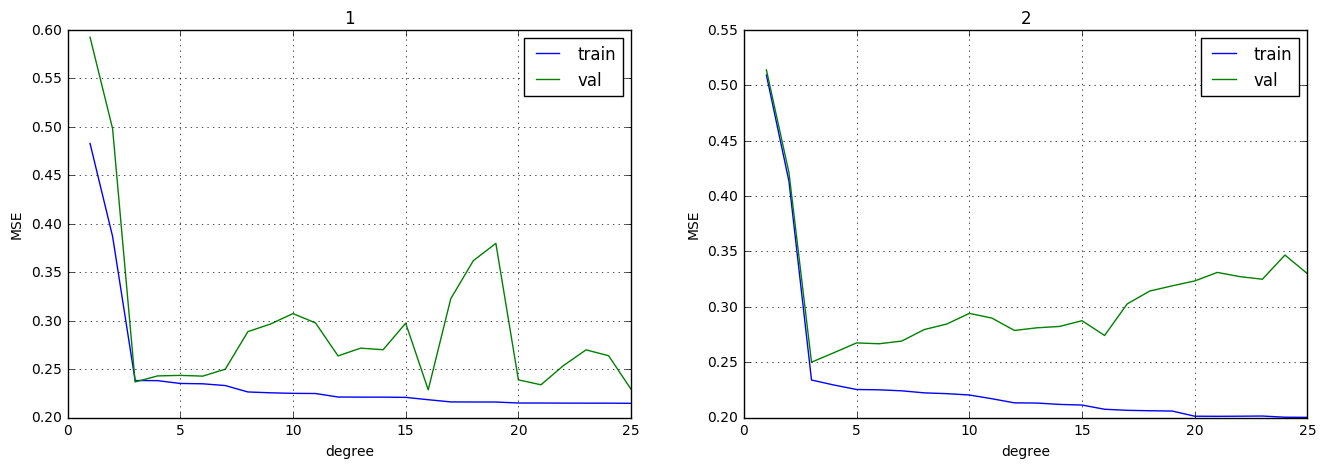

In [7]:
# Для способов 1 и 2
plt.figure("1",figsize=[16, 5])

plt.subplot(1,2,1)
plt.title("1")
plt.plot(range(1, 26), mse_train_1, label='train')
plt.plot(range(1, 26), mse_val_1, label='val')
plt.xlabel("degree")
plt.ylabel("MSE")
plt.legend(loc='2')
plt.grid(True)

plt.subplot(1,2,2)
plt.title("2")
plt.plot(range(1, 26), mse_train_2, label='train')
plt.plot(range(1, 26), mse_val_2, label='val')
plt.xlabel("degree")
plt.ylabel("MSE")
plt.legend(loc='2')
plt.grid(True)

plt.show()


<p>5. Графики зависимости R-квадрата от степени полинома для обучающего и проверочного подмножеств</p>

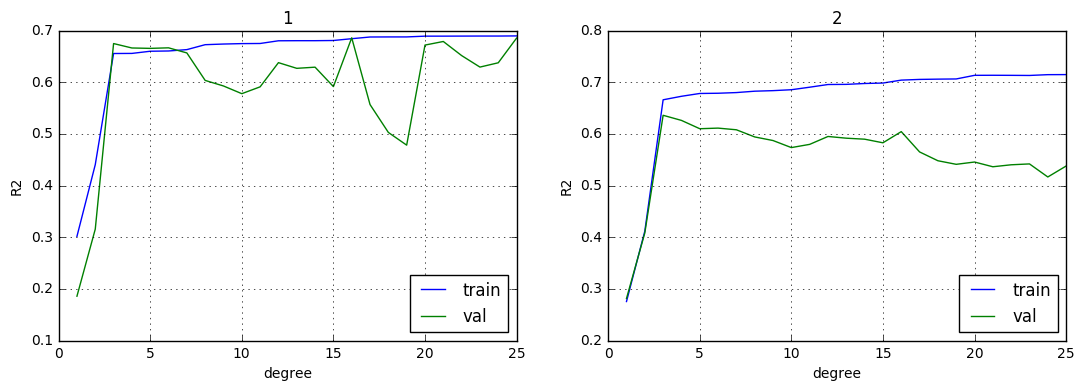

In [8]:
# Для способов 1 и 2

plt.figure("1",figsize=[13, 4])

plt.subplot(1,2,1)
plt.title("1")
plt.plot(range(1, 26), R2_train_1, label='train')
plt.plot(range(1, 26), R2_val_1, label='val')
plt.xlabel("degree")
plt.ylabel("R2")
plt.legend(loc='2')
plt.grid(True)

plt.subplot(1,2,2)
plt.title("2")
plt.plot(range(1, 26), R2_train_2, label='train')
plt.plot(range(1, 26), R2_val_2, label='val')
plt.xlabel("degree")
plt.ylabel("R2")
plt.legend(loc='2')
plt.grid(True)

plt.show()

<p>6. Выбор степени полинома + повторное обучение модели на train_init</p>

In [9]:
# Для способов 1 и 2
print('Способ 1:')
degree_1 = mse_val_1.index(min(mse_val_1))
print("best degree:", degree_1 + 1)
new_model_1 = Pipeline([("plFeatures", PolynomialFeatures(degree=degree_1 + 1)), ("lr", LinearRegression(fit_intercept=True, normalize=True))])
new_model_1.fit(x_train_init, y_train_init)   

print('Способ 2:')
degree_2 = mse_val_2.index(min(mse_val_2))
print("best degree:", degree_2 + 1)
new_model_2 = Pipeline([("plFeatures", PolynomialFeatures(degree=degree_2 + 1)), ("lr", LinearRegression(fit_intercept=True, normalize=True))])
new_model_2.fit(x_train_init, y_train_init)   




Способ 1:
best degree: 16
Способ 2:
best degree: 3


Pipeline(steps=[('plFeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True))])

<p>7. Cреднеквадратическая ошибка на тестовом подмножестве</p>

In [10]:
# Для способов 1 и 2

#1 способ
pred_test_1 = new_model_1.predict(x_test)
mse_test_1 = mean_squared_error(y_test,pred_test_1)

#2 способ
pred_test_2 = new_model_2.predict(x_test)
mse_test_2 = mean_squared_error(y_test,pred_test_2)

print('Способ 1:')
print("MSE test: ", mse_test_1)
print('Способ 2:')
print("MSE test: ", mse_test_2)

Способ 1:
MSE test:  0.260193077686
Способ 2:
MSE test:  0.222976605724


<p>8. График функции регрессии (наилучший случай) + исходные данные</p>

Способ 1:


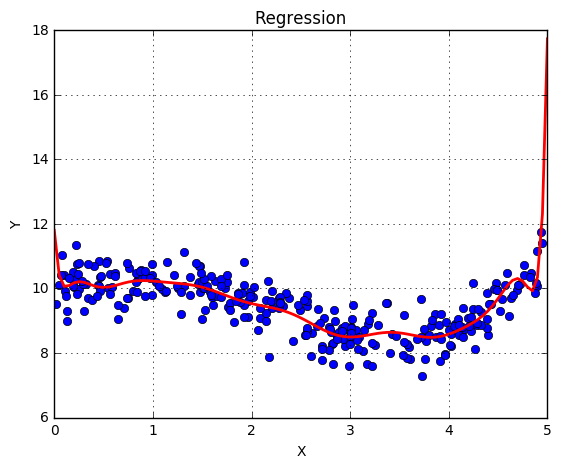

Способ 2:


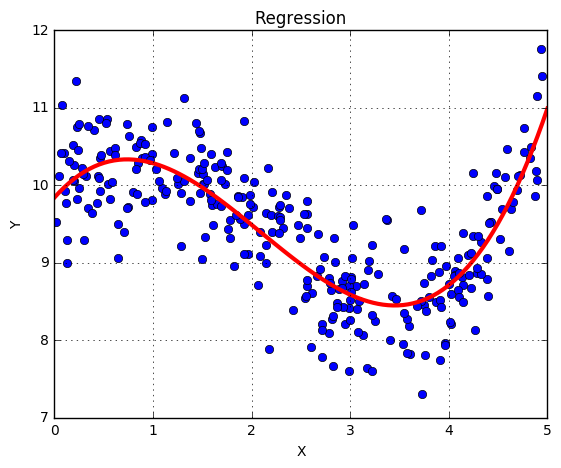

In [11]:
import numpy as np
# Для способов 1 и 2
df = pnd.read_csv("data/Reg_A5.csv")
x = df.X.values
y = df.Y.values

#1 способ
print('Способ 1:')
plt.figure("1",figsize=[14,5])
plt.subplot(1,2,1)
plt.xlabel("X")
plt.ylabel("Y")
xx = np.linspace(0,5,100).reshape(-1, 1)
plt.title("Regression")
plt.plot(x, y, "o")
plt.plot(xx, new_model_1.predict(xx), color="red", lw=2)
plt.grid(True)
plt.show()

#2 способ
print('Способ 2:')
plt.figure("1",figsize=[14,5])
plt.subplot(1,2,1)
plt.xlabel("X")
plt.ylabel("Y")
xx = np.linspace(0,5,100).reshape(-1, 1)
plt.title("Regression")
plt.plot(x,y,"o")
plt.plot(xx, new_model_2.predict(xx),color="red", lw=3)
plt.grid(True)

plt.show()

<p>9. Сравнение результатов для различных способов</p>

В способе 1 степень полинома выше, чем во втором, и произошло переобучение – MSE больше.

<p><b>Задача 2.</b> Классификация + кросс-валидация</p>

<p>Дано множество наблюдений (файл "Cl_A5_Vx.csv"), классификатор - логистическая регрессия. Найти степень полинома с минимальной ошибкой на проверочном подможестве, определить долю правильных классификаций на тестовом подмножестве?</p>
<p>
Построить графики:<br>
1) зависимости доли правильных классификаций от <b>степени полинома</b> для обучающего и проверочного подмножеств<br>
2) зависимости доли правильных классификаций от <b>количества итераций</b> для обучающего и проверочного подмножеств для наилучшего случая<br>
3) результат классификации для наилучшего случая для обучающего и проверочного подмножеств</p>
4) результат классификации для тестового подмножества</p>

<p>1. Загрузка исходных данных</p>

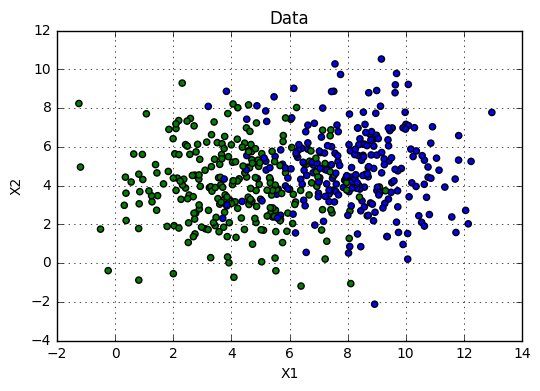

In [12]:
df = pnd.read_csv("data/Cl_A5_V"+str(variant)+".csv") #variant - вариант задания

plt.title("Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(df.X1, df.X2, c=df.Y, cmap=clrMap)
plt.grid(True)
plt.show()

x_1 = [i for i in df.X1]
x_2 = [i for i in df.X2]
x = np.column_stack((x_1, x_2))
y = [i for i in df.Y]

<p>2. Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств</p>

In [13]:
# Способ 1
x_train_init, x_test, y_train_init, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

# Способ 2
# Воспользоваться KFold с параметрами n=len(x_train_init), n_folds=4, shuffle=True, random_state=0

from sklearn.cross_validation import KFold

kf = KFold(n=len(x_train_init), n_folds=4, shuffle=True, random_state=0)

<p>3. Обучение</p>

In [14]:
#Параметры классификатора
#penalty="l2", fit_intercept=True, max_iter=x, C=1e5, solver="lbfgs", random_state=12345

# Для способов 1 и 2

# Для способа 2
#Для каждой степени полинома ошибка обучения:
#MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)

#Для каждой степени полинома ошибка на проверочном подмножестве:
#MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Для 1 способа
mse_train_1 = []
mse_val_1 = []
acc_train_1 = []
acc_val_1 = []

for i in range(1,26):
    model_1 = Pipeline([("pFeatures", PolynomialFeatures(degree=i)), 
                        ("lr", LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1e5, solver="lbfgs", random_state=12345))])
    
    model_1 = model_1.fit(x_train,y_train)
    pred_train = model_1.predict(x_train)
    
    num_mse_train_1 = mean_squared_error(y_train, pred_train)
    num_acc_train_1 = accuracy_score(y_train, pred_train)
    
    pred_val = model_1.predict(x_val)
    num_mse_val_1 = mean_squared_error(y_val, pred_val)
    num_acc_val_1 = accuracy_score(y_val, pred_val)
    
    mse_train_1.append(num_mse_train_1)
    mse_val_1.append(num_mse_val_1)
    acc_train_1.append(num_acc_train_1)
    acc_val_1.append(num_acc_val_1)

#Для 2 способа
mse_train_2 = []
mse_val_2 = []
acc_val_2 = []
acc_train_2 = []
for i in range(1,26):   
    model_2 = Pipeline([("plFeatures", PolynomialFeatures(degree=i)), ("lr", LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1e5, solver="lbfgs", random_state=12345))])  
    
    num_mse_train_2 = 0
    num_mse_val_2 = 0
    num_acc_train_2 = 0
    num_acc_val_2 = 0
    
    for train_index, val_index in kf: 
        x_train_2 = x_train_init[train_index]
        x_val_2 = x_train_init[val_index]  
        y_train_2 = []
        y_val_2 = []
        y_pred_train = []
        y_pred_val = []
        
        for i in range(len(train_index)):
            y_train_2.append(y_train_init[train_index[i]])
        
        for i in range(len(val_index)):
            y_val_2.append(y_train_init[val_index[i]])   
            
        model_2.fit(x_train_2, y_train_2) 
        y_pred_train = model_2.predict(x_train_2)
        y_pred_val = model_2.predict(x_val_2)
        
        num_mse_train_2 = num_mse_train_2 + 1/4 * mean_squared_error(y_train_2, y_pred_train)
        num_acc_train_2 = num_acc_train_2 + 1/4 * model_2.score(x_train_2, y_train_2)
        num_mse_val_2 = num_mse_val_2 + 1/4 * mean_squared_error(y_val_2, y_pred_val)
        num_acc_val_2 = num_acc_val_2 + 1/4 * model_2.score(x_val_2, y_val_2)
        
    mse_val_2.append(num_mse_val_2)
    mse_train_2.append(num_mse_train_2)
    acc_train_2.append(num_acc_train_2)
    acc_val_2.append(num_acc_val_2)

print('Способ 1:')
degree_1 = mse_val_1.index(min(mse_val_1))
print("best degree:", degree_1 + 1)

print('Способ 2:')
degree_2 = mse_val_2.index(min(mse_val_2))
print("best degree:", degree_2 + 1)

Способ 1:
best degree: 1
Способ 2:
best degree: 1


<p>4. Графики зависимости доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств</p>

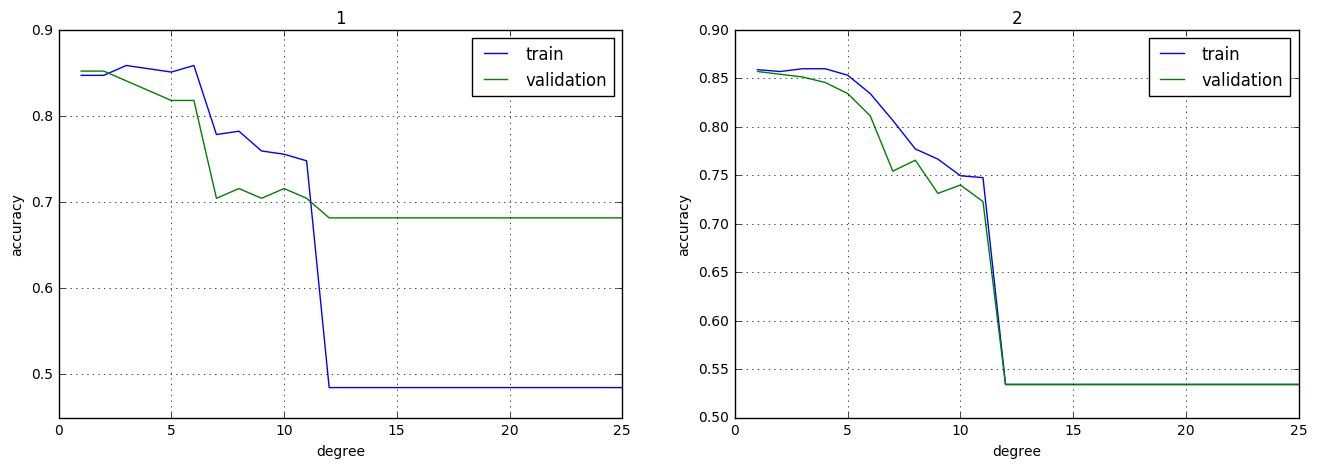

In [15]:
# Для способов 1 и 2

plt.figure("1",figsize=[16,5])
#1 способ
plt.subplot(1,2,1)
plt.xlabel("degree")
plt.ylabel("accuracy")
plt.title("1")
plt.plot(range(1,26), acc_train_1, label="train")
plt.plot(range(1,26), acc_val_1, label="validation")
plt.legend()
plt.grid(True)

#2 способ
plt.subplot(1,2,2)
plt.xlabel("degree")
plt.ylabel("accuracy")
plt.title("2")
plt.plot(range(1,26), acc_train_2, label="train")
plt.plot(range(1,26), acc_val_2, label="validation")
plt.legend()
plt.grid(True)

<p>5. Графики зависимости доли правильных классификаций от количества итераций для обучающего (train) и проверочного подмножеств для наилучшего случая - изменение параметра max_iter</p>

Способ 1:


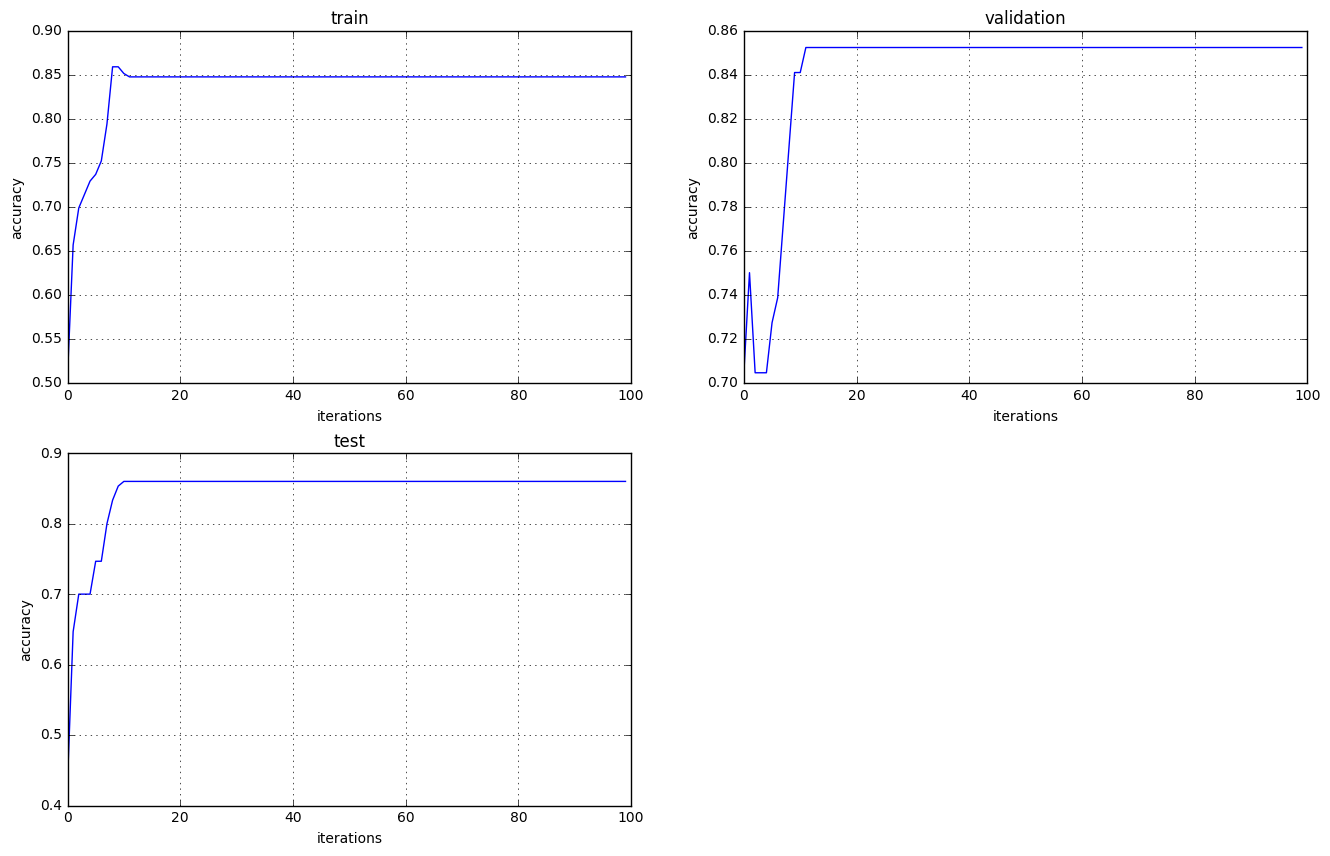

Способ 2:


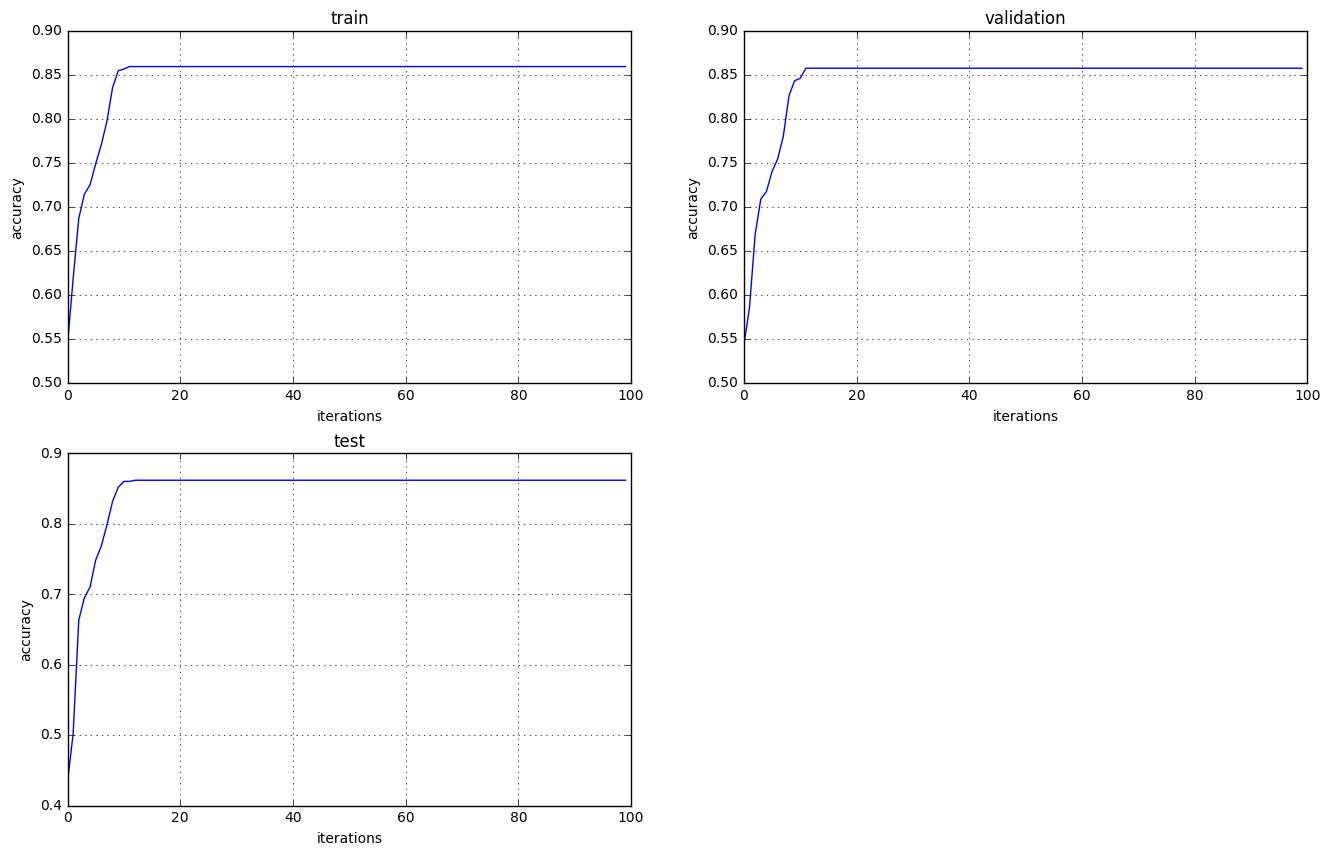

In [16]:
# Для способов 1 и 2

print('Способ 1:')

acc_val_1=[]
acc_train_1=[]
acc_test_1=[]

for i in range(0,100):
    model_1 = Pipeline([("plF", PolynomialFeatures(degree=1)), ("lr", LogisticRegression(penalty="l2", fit_intercept=True, max_iter=i, C=1e5, solver="lbfgs", random_state=12345))])
    model_1.fit(x_train, y_train)
    
    y_pred_train = model_1.predict(x_train)
    acc_train_1.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_val = model_1.predict(x_val)
    acc_val_1.append(accuracy_score(y_val, y_pred_val))
    
    y_pred_test = model_1.predict(x_test)
    acc_test_1.append(accuracy_score(y_test, y_pred_test))
    
plt.figure("2", figsize=[16, 10])
    
plt.subplot(2,2,1)
plt.title("train")
x = range(0,100)
y1 = acc_train_1
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.plot(x, y1)
plt.grid(True)

plt.subplot(2,2,2)
plt.title("validation")
x = range(0,100)
y2 = acc_val_1
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.plot(x, y2)
plt.grid(True)

plt.subplot(2,2,3)
plt.title("test")
x = range(0,100)
y3 = acc_test_1
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.plot(x, y3)
plt.grid(True)

plt.show()

print('Способ 2:')

train_2 = []
val_2 = []
acc_val_2 = []
acc_train_2 = []
acc_test_2 = []

for i in range(0,100):
    model_2 = Pipeline([("plF", PolynomialFeatures(degree=1)), ("lr", LogisticRegression(penalty="l2", fit_intercept=True, max_iter=i, C=1e5, solver="lbfgs", random_state=12345))])
    
    num_acc_train_2 = 0
    num_acc_val_2 = 0
    num_acc_test_2 = 0
    
    for train_index, val_index in kf: 
        x_train_2 = x_train_init[train_index]
        x_val_2 = x_train_init[val_index]
        
        y_train_2 = []
        y_val_2 = []
        y_pred_train = []
        y_pred_val = []
        y_pred_test = []
        
        for i in range(len(train_index)):
            y_train_2.append(y_train_init[train_index[i]])
        for i in range(len(val_index)):
            y_val_2.append(y_train_init[val_index[i]])
        
        model_2.fit(x_train_2, y_train_2)
        
        y_pred_train = model_2.predict(x_train_2)
        num_acc_train_2 = num_acc_train_2 + 1/4 * accuracy_score(y_train_2, y_pred_train)
        
        y_pred_val = model_2.predict(x_val_2)
        num_acc_val_2 = num_acc_val_2 + 1/4 * accuracy_score(y_val_2, y_pred_val)
        
        y_pred_test = model_2.predict(x_test)
        num_acc_test_2 = num_acc_test_2 + 1/4 * accuracy_score(y_test, y_pred_test)
    
    acc_train_2.append(num_acc_train_2)
    acc_val_2.append(num_acc_val_2)
    acc_test_2.append(num_acc_test_2)
    
plt.figure("2", figsize=[16,10])
    
plt.subplot(2,2,1)
plt.title("train")
x = range(0,100)
y4 = acc_train_2
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.plot(x, y4)
plt.grid(True)

plt.subplot(2,2,2)
plt.title("validation")
x = range(0,100)
y5 = acc_val_2
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.plot(x, y5)
plt.grid(True)

plt.subplot(2,2,3)
plt.title("test")
x = range(0,100)
y6 = acc_test_2
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.plot(x, y6)
plt.grid(True)

plt.show()

<p>6. Повторное обучение на train_init наилучшей модели по данным из пункта 4</p>

In [17]:
# Для способов 1 и 2
print('Способ 1:')
print("best degree:", degree_1 + 1)
new_model_1 = Pipeline([("plF", PolynomialFeatures(degree=1)), ("lr", LogisticRegression(penalty="l2", fit_intercept=True, max_iter=120, C=1e5, solver="lbfgs", random_state=12345))])
new_model_1.fit(x_train_init, y_train_init)

print('Способ 2:')
print("best degree:", degree_2 + 1)
new_model_2 = Pipeline([("plF", PolynomialFeatures(degree=1)), ("lr", LogisticRegression(penalty="l2", fit_intercept=True, max_iter=120, C=1e5, solver="lbfgs", random_state=12345))])
new_model_2.fit(x_train_init, y_train_init)

Способ 1:
best degree: 1
Способ 2:
best degree: 1


Pipeline(steps=[('plF', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('lr', LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=120,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=12345,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False))])

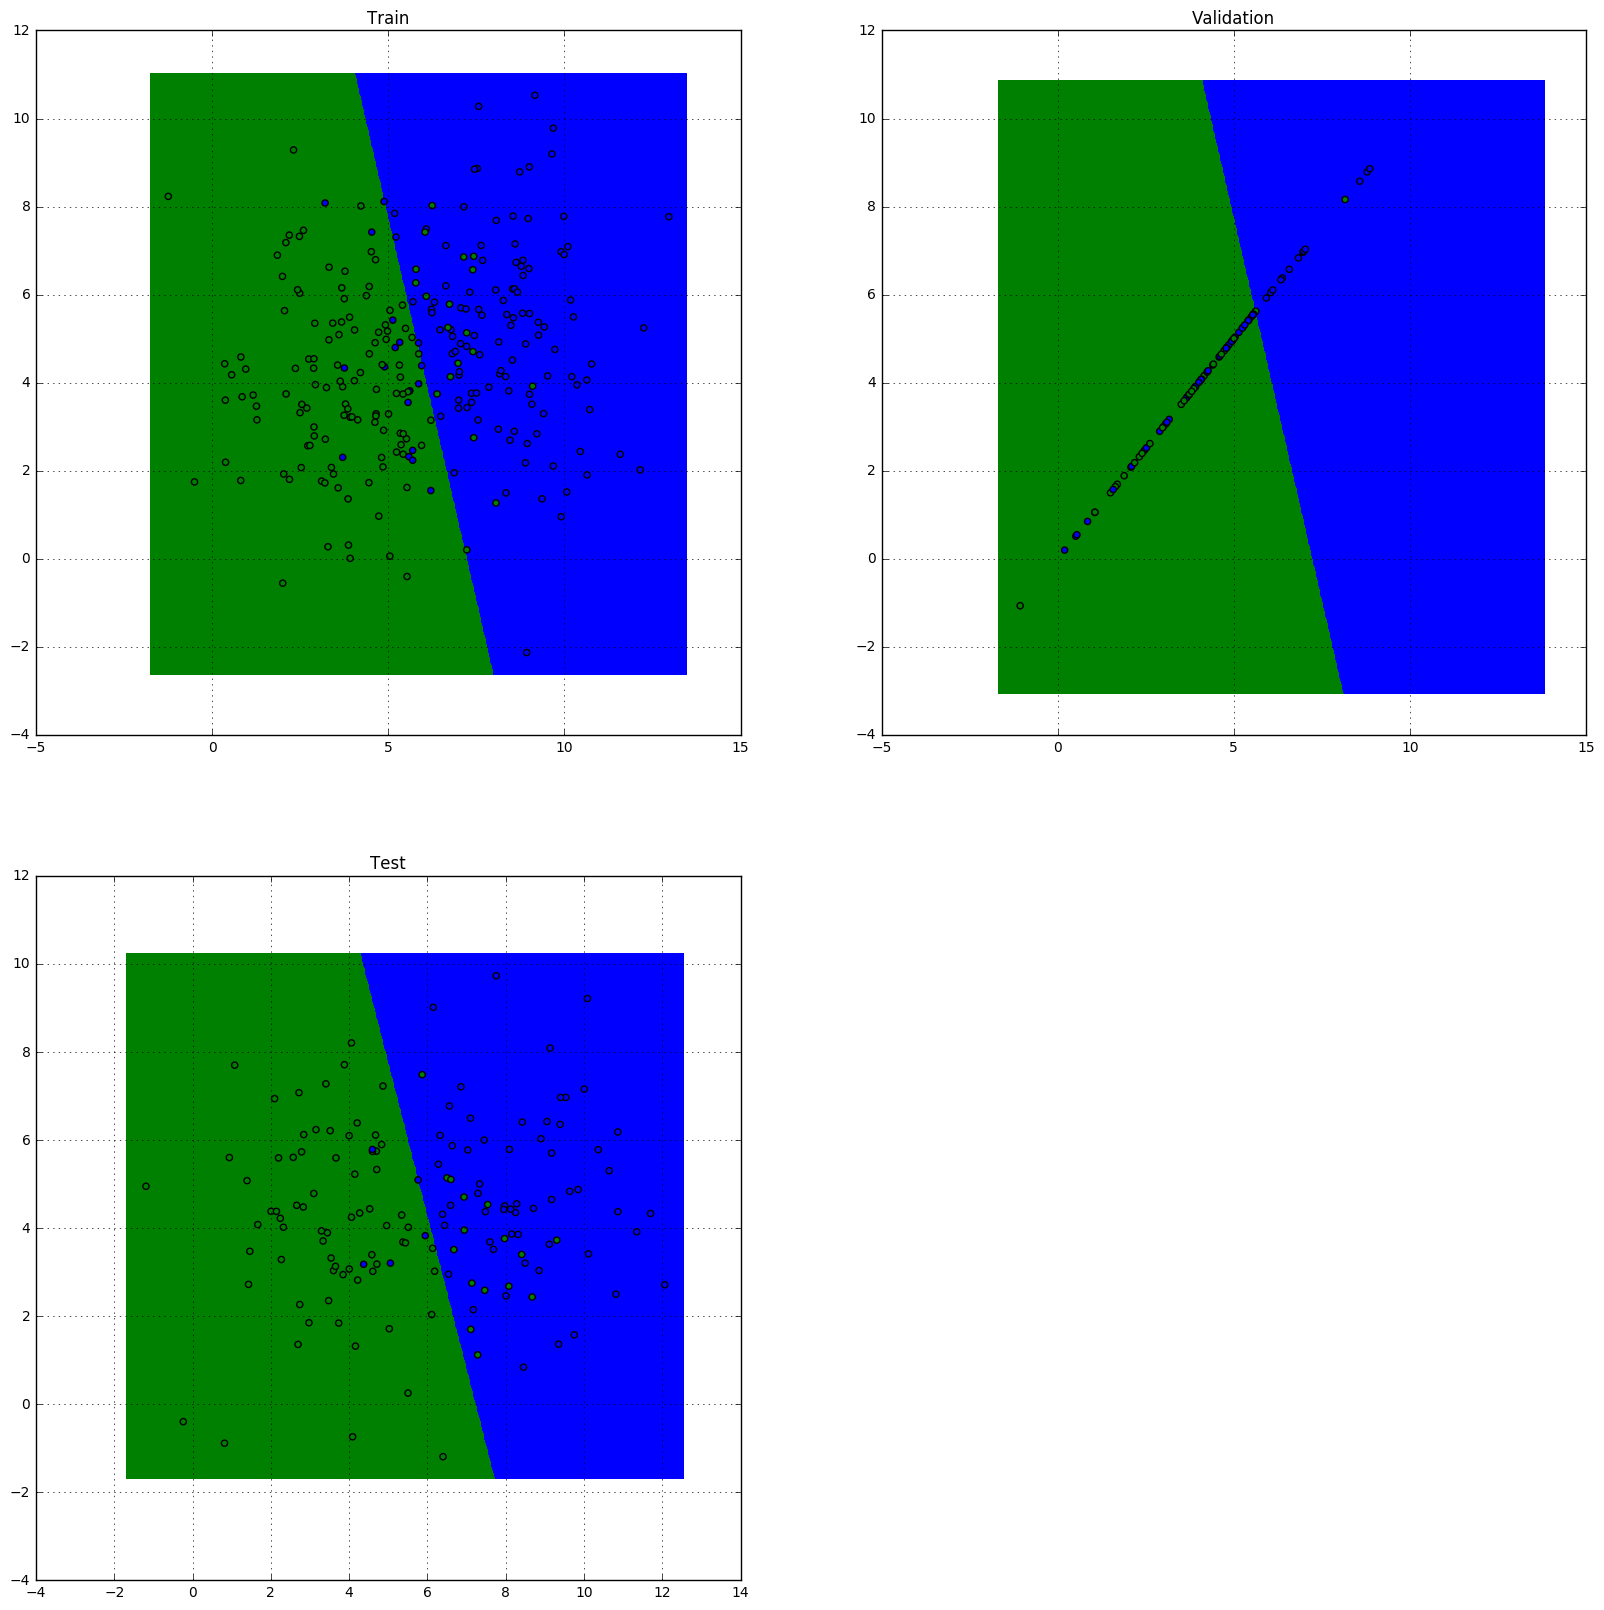

In [18]:
#Графики:
#результат классификации для наилучшего случая для обучающего и проверочного подмножеств
#результат классификации для тестового подмножества
plt.figure("1",figsize=[20,20])

xx, yy = np.meshgrid(np.arange( x_train[:, 0].min() - .5, x_train[:, 0].max() + .5,0.02),np.arange(x_train[:, 1].min() - .5, x_train[:, 1].max() + .5,0.02))
zz = new_model_1.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)

plt.subplot(2,2,1)
plt.title("Train")
plt.pcolormesh(xx, yy, zz, cmap=clrMap)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train,edgecolors='black',cmap=clrMap)
plt.grid(True)

xx, yy = np.meshgrid(np.arange(x_val[:, 0].min() - 2, x_val[:, 0].max() + 2,0.02), np.arange(x_val[:, 1].min() - 2, x_val[:, 1].max() + 2,0.02))
zz = new_model_1.predict(np.c_[xx.ravel(), yy.ravel()])
zz =zz.reshape(xx.shape)
plt.subplot(2,2,2)
plt.title("Validation")
plt.pcolormesh(xx, yy, zz, cmap=clrMap)
plt.scatter(x_val[:, 1], x_val[:, 1], c=y_val,edgecolors='black', cmap=clrMap)
plt.grid(True)

xx, yy = np.meshgrid(np.arange(x_test[:, 0].min() - .5, x_test[:, 0].max() + .5,0.02), np.arange( x_test[:, 1].min() - .5, x_test[:, 1].max() + .5,0.02))
zz = new_model_1.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)
plt.subplot(2,2,3)
plt.title("Test")
plt.pcolormesh(xx, yy, zz, cmap=clrMap)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test,edgecolors='black', cmap=clrMap)
plt.grid(True)

<p><b>Задача 3.</b> Регрессия + регуляризация</p>

<p>1. Загрузка исходных данных</p>

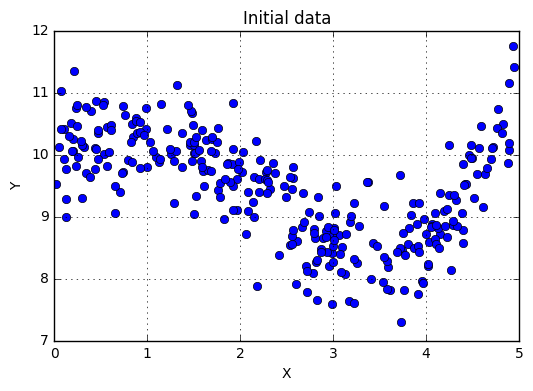

In [19]:
df = pnd.read_csv("data/Reg_A5.csv")

x = (df.X.values).reshape(-1, 1)
y = (df.Y.values).reshape(-1, 1)

plt.title("Initial data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>2. Обучение с кросс-валидацией (см. задачу 1 способ 2) и с использованием Ridge при различных значениях коэф. регуляризации</p>

In [20]:
# Регрессор - Ridge
# Параметры: a fit_intercept=True, normalize=True, random_state=12345
# Здесь и далее СТЕПЕНЬ ПОЛИНОМА - 16!!!

#Коэф. регуляризации
alphas = np.append([0.0], np.logspace(-8, 1, 20, base=10))

#Для каждого значения коэф. регуляризации:
#MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)

#Для каждой степени полинома ошибка на проверочном подмножестве:
#MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)

from sklearn.linear_model import Ridge

train = []
val = []
R2_train = []
R2_val = []

x_train_init, x_test, y_train_init, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
kf = KFold(n=len(x_train_init), n_folds=4, shuffle=True, random_state=0)

for i in alphas:
    model = Pipeline([("plF", PolynomialFeatures(degree=16)), ("lr", Ridge(alpha=i, fit_intercept=True, normalize=True, random_state=12345))])
    
    MeanErrorTrain = 0
    MeanErrorValidation = 0
    num_R2_train = 0
    num_R2_val = 0
    
    for train_index, val_index in kf: 
        y_train = []
        y_val = []
        x_train = x_train_init[train_index].reshape(-1, 1)
        x_val = x_train_init[val_index].reshape(-1, 1)
        for i in range(len(train_index)):
            y_train.append(y_train_init[train_index[i]])
        for i in range(len(val_index)):
            y_val.append(y_train_init[val_index[i]])
        
        model.fit(x_train, y_train)
        
        y_pred_train = model.predict(x_train)
        MeanErrorTrain = MeanErrorTrain + 1/4 * mean_squared_error(y_train, y_pred_train)
        num_R2_train = num_R2_train + 1/4 * r2_score(y_train, y_pred_train)
        
        y_pred_val = model.predict(x_val)
        MeanErrorValidation = MeanErrorValidation + 1/4 * mean_squared_error(y_val, y_pred_val)
        num_R2_val = num_R2_val + 1/4 * r2_score(y_val, y_pred_val)
        
    train.append(MeanErrorTrain)
    val.append(MeanErrorValidation)
    R2_train.append(num_R2_train)
    R2_val.append(num_R2_val)

<p>3. Графики зависимости среднеквадратической ошибки от степени полинома для обучающего и проверочного подмножеств</p>

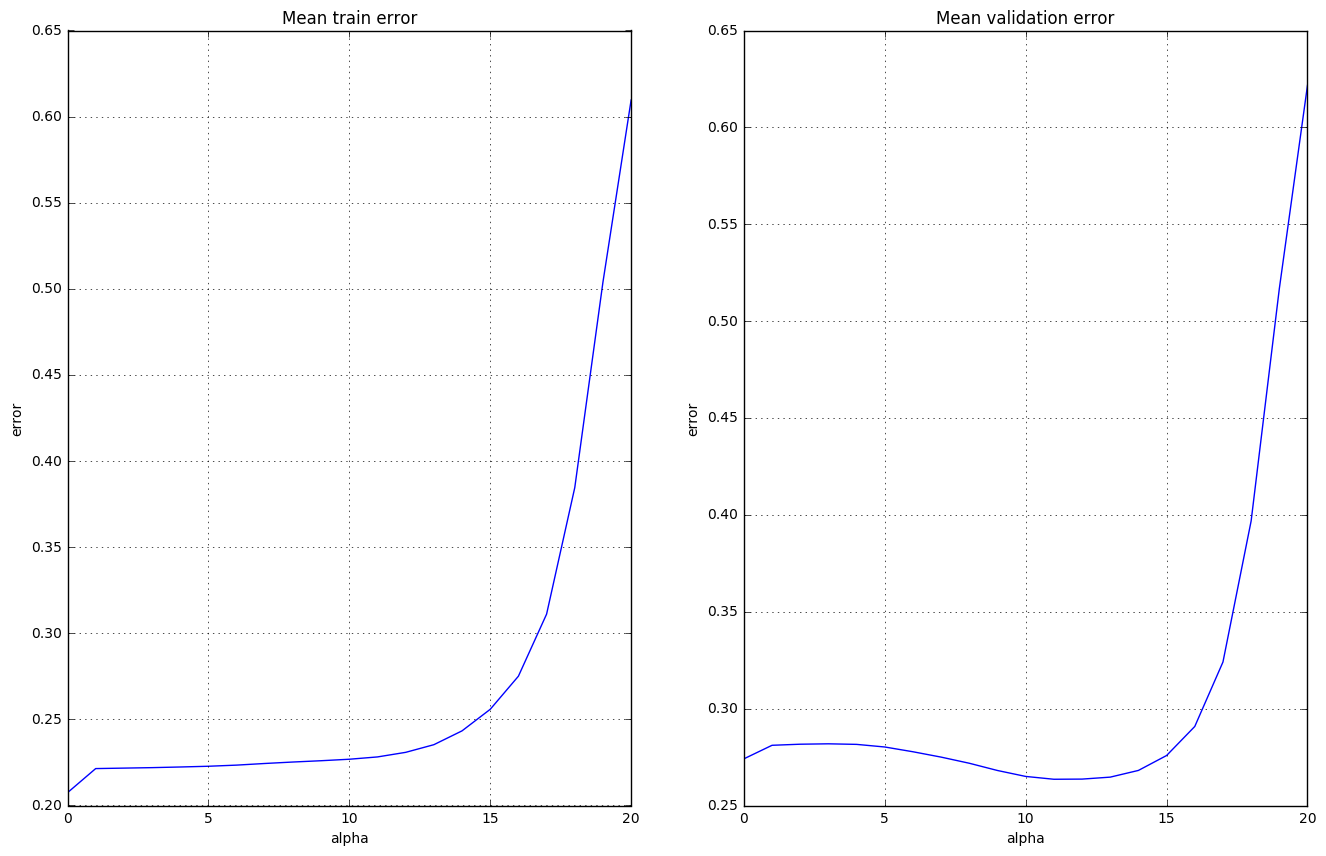

In [21]:
plt.figure("1",figsize=[16, 10])

plt.subplot(1,2,1)
plt.title("Mean train error")
x = range(len(alphas))
y = train
plt.xlabel("alpha")
plt.ylabel("error")
plt.plot(x, y)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Mean validation error")
x = range(len(alphas))
y = val
plt.xlabel("alpha")
plt.ylabel("error")
plt.plot(x, y)
plt.grid(True)

plt.show()

<p>4. Графики зависимости R-квадрата от степени полинома для обучающего и проверочного подмножеств</p>

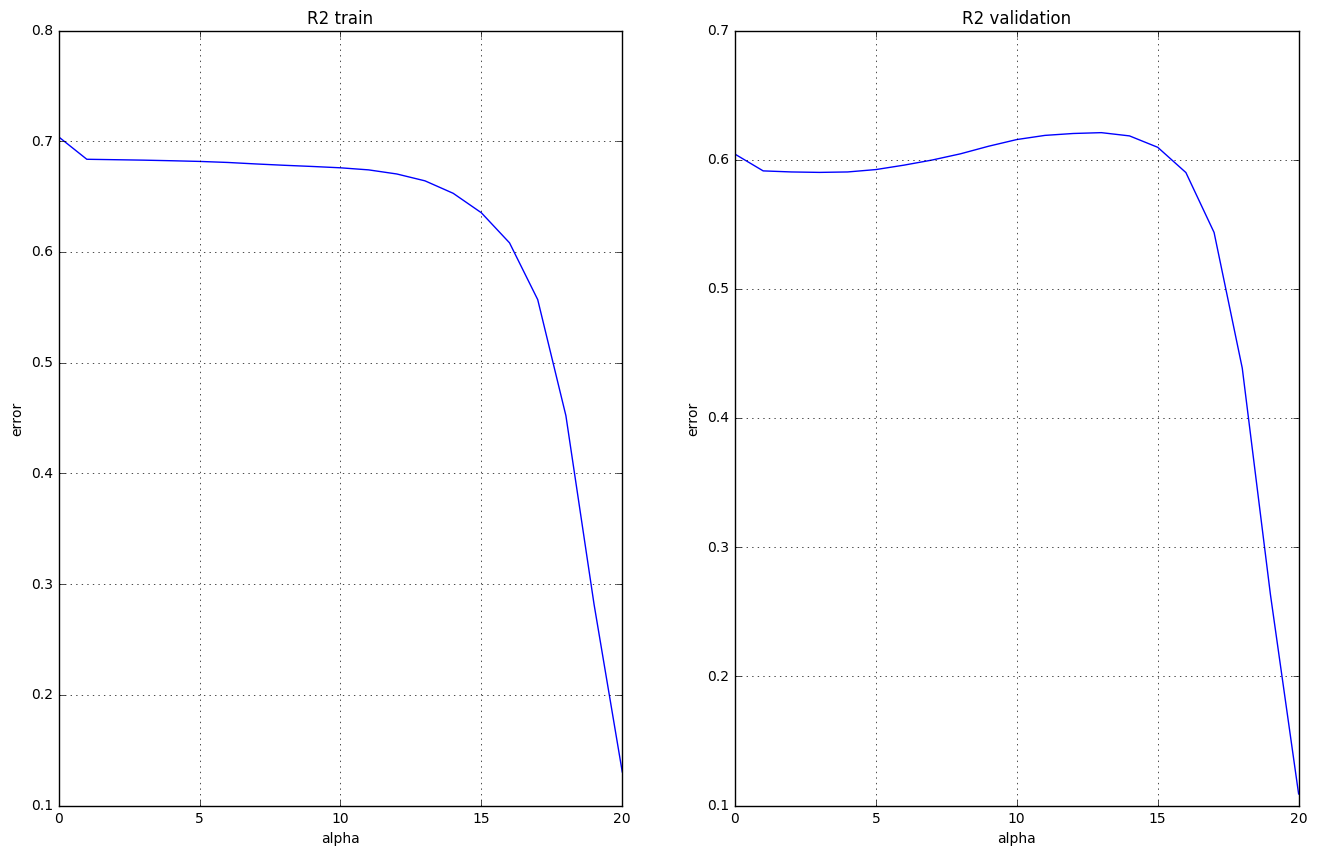

In [22]:
plt.figure("1",figsize=[16, 10])

plt.subplot(1,2,1)
plt.title("R2 train")
x = range(len(alphas))
y = R2_train
plt.xlabel("alpha")
plt.ylabel("error")
plt.plot(x, y)
plt.grid(True)

plt.subplot(1,2,2)
plt.title("R2 validation")
x = range(len(alphas))
y = R2_val
plt.xlabel("alpha")
plt.ylabel("error")
plt.plot(x, y)
plt.grid(True)

plt.show()

<p>5. Найти коэф. рег. с минимальной ошибкой на val</p>

In [23]:
alpha = alphas[val.index(min(val))]
print(alpha)

0.000545559478117


<p>8. Обучение на train_init с использованием Ridge и параметром alpha=(значение из пункта 2)</p>

In [24]:
new_model = Pipeline([("plF", PolynomialFeatures(degree=16)), ("lr", Ridge(alpha=alphas[val.index(min(val))], fit_intercept=True, normalize=True, random_state=12345))])
new_model.fit(x_train_init, y_train_init)

Pipeline(steps=[('plF', PolynomialFeatures(degree=16, include_bias=True, interaction_only=False)), ('lr', Ridge(alpha=0.00054555947811685149, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=12345, solver='auto',
   tol=0.001))])

<p>9. Определить ошибку на тестовом подмножестве</p>

In [25]:
y_pred_test = new_model.predict(x_test)
MeanErrorTest = mean_squared_error(y_test, y_pred_test)
print(MeanErrorTest)

0.221937162035


<p>10. Построить график регрессии</p>

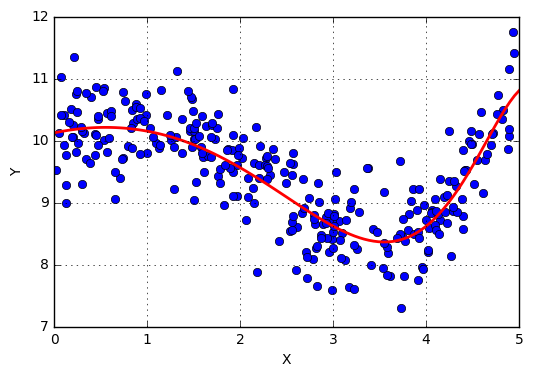

In [26]:
df = pnd.read_csv("data/Reg_A5.csv")

x = df.X.values
y = df.Y.values

xx = np.linspace(0,5,100).reshape(-1, 1)
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.plot(xx, new_model.predict(xx), color="red", lw=2)
plt.grid(True)

<p>11. Сделать заключение о влиянии коэффициента регуляризации</p>

In [27]:
#Переобучения не произошло